In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd class_machinelearning

/content/drive/My Drive/class_machinelearning


In [0]:
import numpy as np
import random 
import matplotlib.pyplot as plt

## INPUT DATA
## data.csv에서 data를 받아와서 그리기

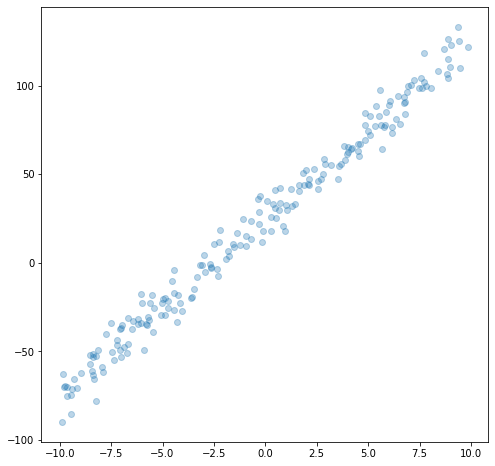

In [0]:
## check the data
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, alpha=0.3)
plt.show()

In [0]:
def fuc(a, b) :
    f_arr = float(a) * x_axis + float(b)
    return f_arr

## Gradient Descent for linear regression

Hypothesis 
$$h_\theta(x)=\theta_0+\theta_1(x)$$

Objective funtion(cost function)
$$
J(\theta)=\frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)})−y^{(i)})^2
$$

GD Algorithm
$$
\theta_0^{(t+1)} : = \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})
$$
$$
\theta_1^{(t+1)} : = \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x^{(i)}
$$

In [56]:
x_axis = x_data
y = y_data

# y value list for graph 
list_th0 = []
list_th1 = []
list_J = [] 

## hypothesis
def h(th0, th1):
    hypo = th0 + th1*(x_axis)
    return hypo

## cost function
def J(th0, th1):
  cost = (1/(2*len(x_axis)))*np.sum((h(th0, th1)-y)**2)
  return cost

## settings for GD algorithm
itr = np.arange(1000)+1
th0 = -50
th1 = 50
a = 0.05


## performing gd algorithm for linear regression
for iteration in np.ndenumerate(itr):
    
    ## for checking
    print("iteration : ", iteration)
    print("theta0 : ", th0, "theta1 : ", th1)
    print("cost:", cost)

    list_th0.append(th0)
    list_th1.append(th1)

    cost = J(th0, th1)
    list_J.append(cost)

    temp0 = th0 - a *(1/len(x_axis))*np.sum((h(th0, th1)-y))
    temp1 = th1 - a *(1/len(x_axis))*np.sum((h(th0, th1)-y)*(x_axis))
    th0 = temp0
    th1 = temp1


iteration :  ((0,), 1)
theta0 :  -50 theta1 :  50
cost: 27.46750672590455
iteration :  ((1,), 2)
theta0 :  -45.2782797625 theta1 :  -17.2192145128258
cost: 30496.008337506235
iteration :  ((2,), 3)
theta0 :  -42.43070672703802 theta1 :  25.390347509660522
cost: 13596.19238685879
iteration :  ((3,), 4)
theta0 :  -38.6871623658206 theta1 :  -1.477081570836443
cost: 6700.851605556099
iteration :  ((4,), 5)
theta0 :  -35.78552606376636 theta1 :  15.599138271637134
cost: 3821.44012139448
iteration :  ((5,), 6)
theta0 :  -32.612842153087186 theta1 :  4.874640087949761
cost: 2560.551486762448
iteration :  ((6,), 7)
theta0 :  -29.860137120202722 theta1 :  11.731745273810951
cost: 1957.7991332969198
iteration :  ((7,), 8)
theta0 :  -27.077966935257503 theta1 :  7.463915752882468
cost: 1627.8909887155046
iteration :  ((8,), 9)
theta0 :  -24.538907752821814 theta1 :  10.229741601161711
cost: 1415.7423756369296
iteration :  ((9,), 10)
theta0 :  -22.05940127775472 theta1 :  8.54312194325084
cost: 1

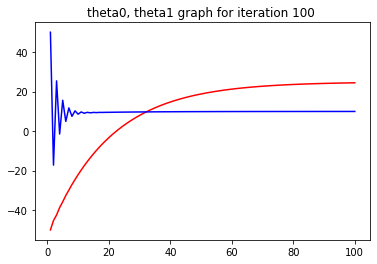

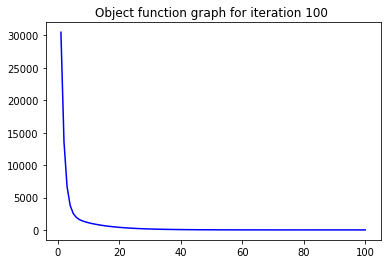

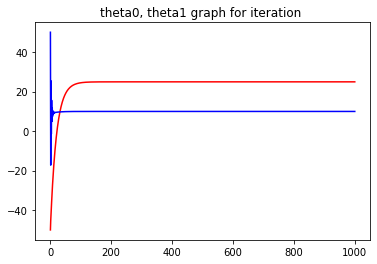

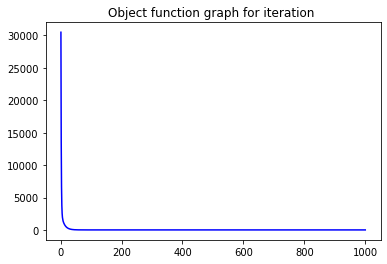

In [57]:
# graph for all iterations 
# can't show how theta0, theta1 and cost value changes correctly. 
# so graphs for 100 iteration and for all iteration will show

#theta0, theta1
plt.title("theta0, theta1 graph for iteration 100 ")
plt.plot(itr[:100], np.array(list_th0[:100]), color = 'red')
plt.plot(itr[:100], np.array(list_th1[:100]), color = 'blue')
plt.show()

plt.title("theta0, theta1 grapth for iteration 1000")

#J(th0, th1)
plt.title("Object function graph for iteration 100 ")
plt.plot(itr[:100], np.array(list_J[:100]), color = 'blue' )
plt.show()

#theta0, theta1
plt.title("theta0, theta1 graph for iteration ")
plt.plot(itr, np.array(list_th0), color = 'red')
plt.plot(itr, np.array(list_th1), color = 'blue')
plt.show()


#J(th0, th1)
plt.title("Object function graph for iteration ")
plt.plot(itr, np.array(list_J), color = 'blue' )
plt.show()



# Ploting linear regression result

set of points and linear function obtained by GD

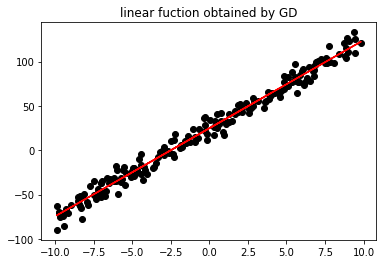

In [59]:
plt.title("linear fuction obtained by GD")
line_gd = fuc(th1, th0)
plt.plot(x_axis, line_gd, color = 'red')
plt.scatter(x_axis, y_data, color = 'black')